# Binary classification
---
## Essential questions in life: How to distinguish dog from cat pictures ?
![Binary classification](resources/dog_cat.jpeg)

## Dataset 
In classification tasks our dataset has the following form:

$D={((\mathbf x_{1}, y_{1}), ..., (\mathbf x_{N}, y_{N}))}$,

where $y_{i}$ is either 1(=dog) or 0(=cat)


### Goal of a classification algorithm:
In more formal terms, the main goal of a classification algorithm is to learn how to maximize the probability $p(y=1|x=\text{dog data})$ and $p(y=0|x=\text{cat data})$, respectively. Or in other words: A trained classifier should, when given a dog data input, output a high probability value > 0.5(= 50%), and when given a cat picture, output a low probability value < 0.5. An untrained classifier would usually output a value around 0.5, meaning it would classify the inputs by chance.

## Visualizing a trained classification boundary
---

![Binary classification](resources/dc_classifier.png)

# Measuring classification performance
---

# Confusion matrix
---
---
A confusion matrix is a good way to represent the performance of a classification algorithm. 
![Binary classification](resources/conf_mat1.png)
![Binary classification](resources/conf_mat2.png)

### Accuracy of our model = $\frac{\text{no. of correct classified points}}{total points}$

# Other possible measures
---
Usually we start judging the performance of our trained model by evaluating it's accuracy.
![Binary classification](resources/conf_mat3.png)

# Classification Algorithms
---
Various classification algorithms essentially differ in their way of choosing a suitable decision boundary

# 1. Nearest centroid classifier
---
![Binary classification](resources/ncc.png)
#### 1. Compute centroids(mean vector) of both classes:

$\mathbf w_{dogs} = \frac{1}{N_{dogs}}\sum_{x_{i}\epsilon Dogs}\mathbf x_{i}$

$\mathbf w_{cats} = \frac{1}{N_{cats}}\sum_{x_{i}\epsilon Cats}\mathbf x_{i}$

with $N_{dogs/cats}$ = number of dogs/cats

#### 2. Assign new points to the class whose centroid is closest:

$\mathbf y_{new} = \underset{c_{i} \epsilon C}{\operatorname{argmin}}
 dist(x_{new}, w_{i})$, 

where $\mathbf w_{i} \epsilon \mathbf R^{dx1}:$ centroid of class i, $C:$ Set of all classes

#### 3. Recompute centroids of both classes:
$\mathbf w_{dogs}^{new} = \frac{1}{N_{dogs}+1}\sum_{x_{i}\epsilon Dogs}\mathbf x_{i}$, if $y_{new}=Dog$

else:

$\mathbf w_{cats}^{new} = \frac{1}{N_{cats}+1}\sum_{x_{i}\epsilon Cats}\mathbf x_{i}$

#### 4. Restart from point 2. when doing inference on new incoming point

# 2. Logisitic Regression
---
### Objective:
Find a way to interpret the output of a linear regression as a probability distribution over different classes.
### From linear regression to logistic regresssion
$P(y_{i}=1)$: Probability of $x_{i}$ belonging to class 1(=dog)
$P(y_{i}=0)$: Probability of $x_{i}$ belonging to class 2(=cat)
![image.png](resources/logistic_regression.png)
![image.png](resources/sigmoid2.png)

### Note: The term in the exponent of the exponential function is just the output of a linear regression!

## Whats the cost function ?
Typically used cost function is the binary cross-entropy loss:

Scalar form:
$J(\beta) = -\frac{1}{N}\sum_{i=1}^{N}y_{i}\ log(\hat{y_{i}})+(1-y_{i})\ log(1-\hat{y_{i}})$

Vectorized form:
$J(\beta) = -\frac{1}{N}\lvert \mathbf ylog(\hat{\mathbf y})+(1-\mathbf y)\ log(1-\hat{\mathbf y})\lvert$

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

### Loss surface when y=1 (true label)

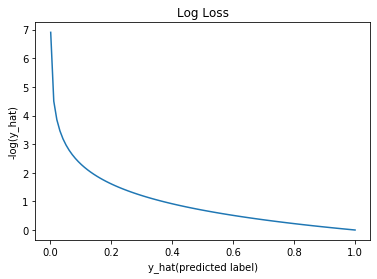

In [2]:
# Assume true y = 1
y_hat = np.linspace(0.001,1,100)
loss = -np.log(y_hat)

fig = plt.figure()
plt.plot(y_hat, loss)
plt.xlabel('y_hat(predicted label)')
plt.ylabel('-log(y_hat)')
plt.title('Log Loss')

plt.show()

### Loss surface when y=0 (true label)

/home/dg/envs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


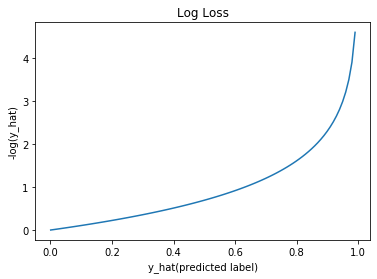

In [7]:
y_hat = np.linspace(0.001,1,100)
loss = -np.log(1-y_hat)

fig = plt.figure()
plt.plot(y_hat, loss)
plt.xlabel('y_hat(predicted label)')
plt.ylabel('-log(y_hat)')
plt.title('Log Loss')
plt.show()

### Objective
$ min_{\beta}J(\beta) \Rightarrow  \nabla J(\beta)$

$\Rightarrow \nabla J(\beta) = \mathbf X ( \hat{\mathbf y}- \mathbf y)$

- Repeat until convergence: $w^{t+1}_{1} \leftarrow w^{t}_{1} - \alpha \nabla_{w^{t}_{1}}J(w_{1}^{t})$

where $\mathbf X \epsilon \mathbb{R}^{Nxd}$, $\mathbf y \epsilon \mathbb{R}^{Nx1}$, $\hat{\mathbf y} \epsilon \mathbb{R}^{Nx1}$, $\hat{\mathbf y}=\mathbf X \mathbf \beta $, $\mathbf \beta \epsilon \mathbb{R}^{dx1}$

# 3. Linear Discriminant Analysis / LDA
---
- Idea: Find optimal projection of the points into 1 dim, such that they can be separated along that projection axis
# Like that ?
![image.png](resources/lda00.png)
![image.png](resources/lda01.png)
# or like that ?
![image.png](resources/lda1.png)
![image.png](resources/lda2.png)
![image.png](resources/lda3.png)

## Objective:
Two criteria are used by LDA to create a new axis:

    Maximize the distance between means of the two classes.
    Minimize the variation within each class.

# 4. Support Vector Machines
---
![image.png](resources/svm.png)
### Objective:

Find a decision boundary such that the distance between it and the closest element of either class is maximized. 

Our in mathematical notation:

$min_{\mathbf w, b}\frac{1}{2}\lvert\lvert \mathbf w \lvert\lvert^{2}$

$s.t. y_{i}(\mathbf w^{T}\mathbf x_{i}+b) \geq 1$, $i=1,...,N$

# Summary of linear methods:
---
- Nearest centroid classifier
- Logistic regression
- Linear Discriminant Analysis
- SVM(linear kernel)

# What about non-linearly separable datasets ?
---

# 1. Feature maps

When dealing with non-linearly separable data we look for a function $\phi$ that applies a map from our original input data space into another feature space, where the data then can be separated using a linear decision boundary.
In classical ML we build feature map $\phi$ by hand, whereas neural networks automatically learn them.

![image.png](resources/nonlinear.png)

# 2. Decision Trees
---
![image.png](resources/decision_tree.png)

### Objective: 

Find feature splits that perfectly split all the classes in the leaf nodes of the decision tree.

# 3. Random Forest
---
![image.png](resources/random_forest.jpeg)
### Objective: 
1. Build many uncorrelated decision trees(e.g. on different parts of the dataset).
2. During inference use all decision trees to predict the label and decide by the rule of majority vote

## Summary of non-linear methods:
- SVM with non-linear kernels
- Neural Networks
- Decision Trees
- etc.
![image.png](resources/nonlinear_boundaries.png)

# What about multiclass-classification ?
---
# Method 1:
- Train K classifiers, where K is the total number of classes. Then perform ensemble prediction for a new data point
![image.png](resources/one_vs_all.jpeg)
## Problem:
---
- highly unbalanced training set

# Method 2:
- Train K(K-1) / 2 classifiers and perform ensemble prediction
![image.png](resources/one_vs_one.png)
## Problem
---
- higher runtime complexity than method 2

# Extending the idea of a train-, test set split
---
We already know that by splitting our dataset into a training set and a test set, then train using the training set and evaluate using the test set, we can approximate the generalization performance of our algorithm. If we want to optimize our hyperparameters however, training on the same training dataset and evaluating on the test dataset is actually already overfitting. That's why we should split our training dataset into a training and validation set which we use to find our best hyperparameter setting, then train the whole training dataset(validation set included) using that best hyperparameter setting, and evaluating the final performance of our algorithm on the test set once.


![Binary classification](resources/crossvalidation.png)

# Move on to practical session